# Predicting Likelihood of Users Clicking Web Ads 

## Overview
This project uses a fake advertising data set, indicating whether or not a particular internet user clicked on an advertisement. I will create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('advertising.csv')

## Initial review of the dataframe

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [70]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

** First, look at distribution of what we are trying to predict -the 'Clicked on Ad' column **

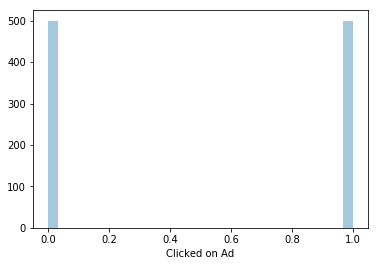

In [3]:
sns.distplot(df['Clicked on Ad'],bins=30,kde=False)

** Observations**

- the dependent variable is binary -- logistic regression is a good model 
- the dataset is well balanced - about half the values are 0 and half are 1


** What information can we extract from categorical features?** 

Columns: 
- 'Ad Topic Line'
- 'City'
- 'Country'
- 'Timestamp'

In [4]:
set(df['Ad Topic Line'])

{'Re-engineered optimal policy',
 'Grass-roots eco-centric instruction set',
 'Synergized coherent interface',
 'Fully-configurable asynchronous firmware',
 'Persistent fault-tolerant service-desk',
 'Multi-channeled reciprocal artificial intelligence',
 'Multi-layered user-facing paradigm',
 'Adaptive asynchronous attitude',
 'Ameliorated upward-trending definition',
 'Progressive analyzing attitude',
 'User-centric solution-oriented emulation',
 'Horizontal client-driven hierarchy',
 'Organic contextually-based focus group',
 'Multi-tiered foreground Graphic Interface',
 'Managed 6thgeneration hierarchy',
 'Secured secondary superstructure',
 'Business-focused encompassing neural-net',
 'Configurable interactive contingency',
 'Customer-focused upward-trending contingency',
 'Implemented bottom-line implementation',
 'Reactive impactful challenge',
 'Pre-emptive client-server installation',
 'Sharable 5thgeneration access',
 'Total directional approach',
 'Streamlined next generation

In [5]:
set(df['City'])

{'Adamsbury',
 'Adamside',
 'Adamsstad',
 'Alanview',
 'Alexanderfurt',
 'Alexanderview',
 'Alexandrafort',
 'Alexisland',
 'Aliciatown',
 'Alvaradoport',
 'Alvarezland',
 'Amandafort',
 'Amandahaven',
 'Amandaland',
 'Amyfurt',
 'Amyhaven',
 'Andersonchester',
 'Andersonfurt',
 'Andersonton',
 'Andrewborough',
 'Andrewmouth',
 'Angelhaven',
 'Anthonyfurt',
 'Ashleychester',
 'Ashleymouth',
 'Austinborough',
 'Austinland',
 'Bakerhaven',
 'Barbershire',
 'Beckton',
 'Benjaminchester',
 'Bernardton',
 'Bethburgh',
 'Birdshire',
 'Blairborough',
 'Blairville',
 'Blevinstown',
 'Bowenview',
 'Boyerberg',
 'Bradleyborough',
 'Bradleyburgh',
 'Bradleyside',
 'Bradshawborough',
 'Bradyfurt',
 'Brandiland',
 'Brandonbury',
 'Brandonstad',
 'Brandymouth',
 'Brendaburgh',
 'Brendachester',
 'Brianabury',
 'Brianfurt',
 'Brianland',
 'Brittanyborough',
 'Brownbury',
 'Brownport',
 'Brownton',
 'Browntown',
 'Brownview',
 'Bruceburgh',
 'Burgessside',
 'Butlerfort',
 'Calebberg',
 'Cameronberg',


In [6]:
set(df['Country'])

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica (the territory South of 60 deg S)',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Bouvet Island (Bouvetoya)',
 'Brazil',
 'British Indian Ocean Territory (Chagos Archipelago)',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 

In [8]:
# Alternative method to investigate categorical features:
print('Ad Topic Line: ' + str(df['Ad Topic Line'].nunique()))
print('City: ' + str(df['Ad Topic Line'].nunique()))
print('Country: ' + str(df['Ad Topic Line'].nunique()))

Ad Topic Line: 1000
City: 1000
Country: 1000


There is probably interesting information that could be extracted from Ad Topic Line -- but there are 1000 entries and all of them have unique Ad topics. If there were a smaller subset of Ad Topics, we could split them into different columns and use a dummy variable to show which was the most effective (similar to A/B testing). However, each one unique is not super useful here. 

Likewise for city and country. It may be that people are not clicking on ads from certain regions of the world - and if this is the case, the ads could be re-worded to be more appealing to these cultures. However, more information is needed to make these assumptions - such as which regions the business is focusing on. Also, more information than one entry per country and per city is needed. 

**For this excercise, I will not include the Ad Title, City, or Country columns in my model.** 

**Timestamp, however, can be broken down into additional information and used to determine the optimal time to display ads. I will first look at the day of week and hour.**

In [3]:
#Convert the existing timestamp column (a string) into a timestamp object
df['Timestamp'] = pd.to_datetime(df['Timestamp'],yearfirst=True)

#Create 2 new columns - Hour and Day of week
df['Hour'] = df['Timestamp'].apply(lambda x: x.hour)
df['Day_of_Week'] = df['Timestamp'].apply(lambda x: x.weekday())
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Day_of_Week
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,4


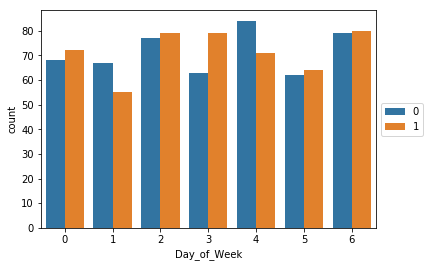

In [13]:
sns.countplot(x='Day_of_Week',hue='Clicked on Ad', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

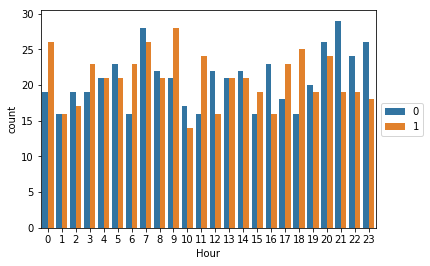

In [14]:
sns.countplot(x='Hour',hue='Clicked on Ad', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

**Observations:** 

Hours where more people click: 
0,3,6,9,11,15,17,18,

More don't click: 
2,5,7,8,10,12,14,16,19,20,21,22,23

Not a strong association, but will put this in the model and see if it helps to improve predictions. 

** Look at all numerical data columns so far - hue defined by the 'Clicked on Ad' column feature.**

C:\Users\kmuss\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kmuss\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\kmuss\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\kmuss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


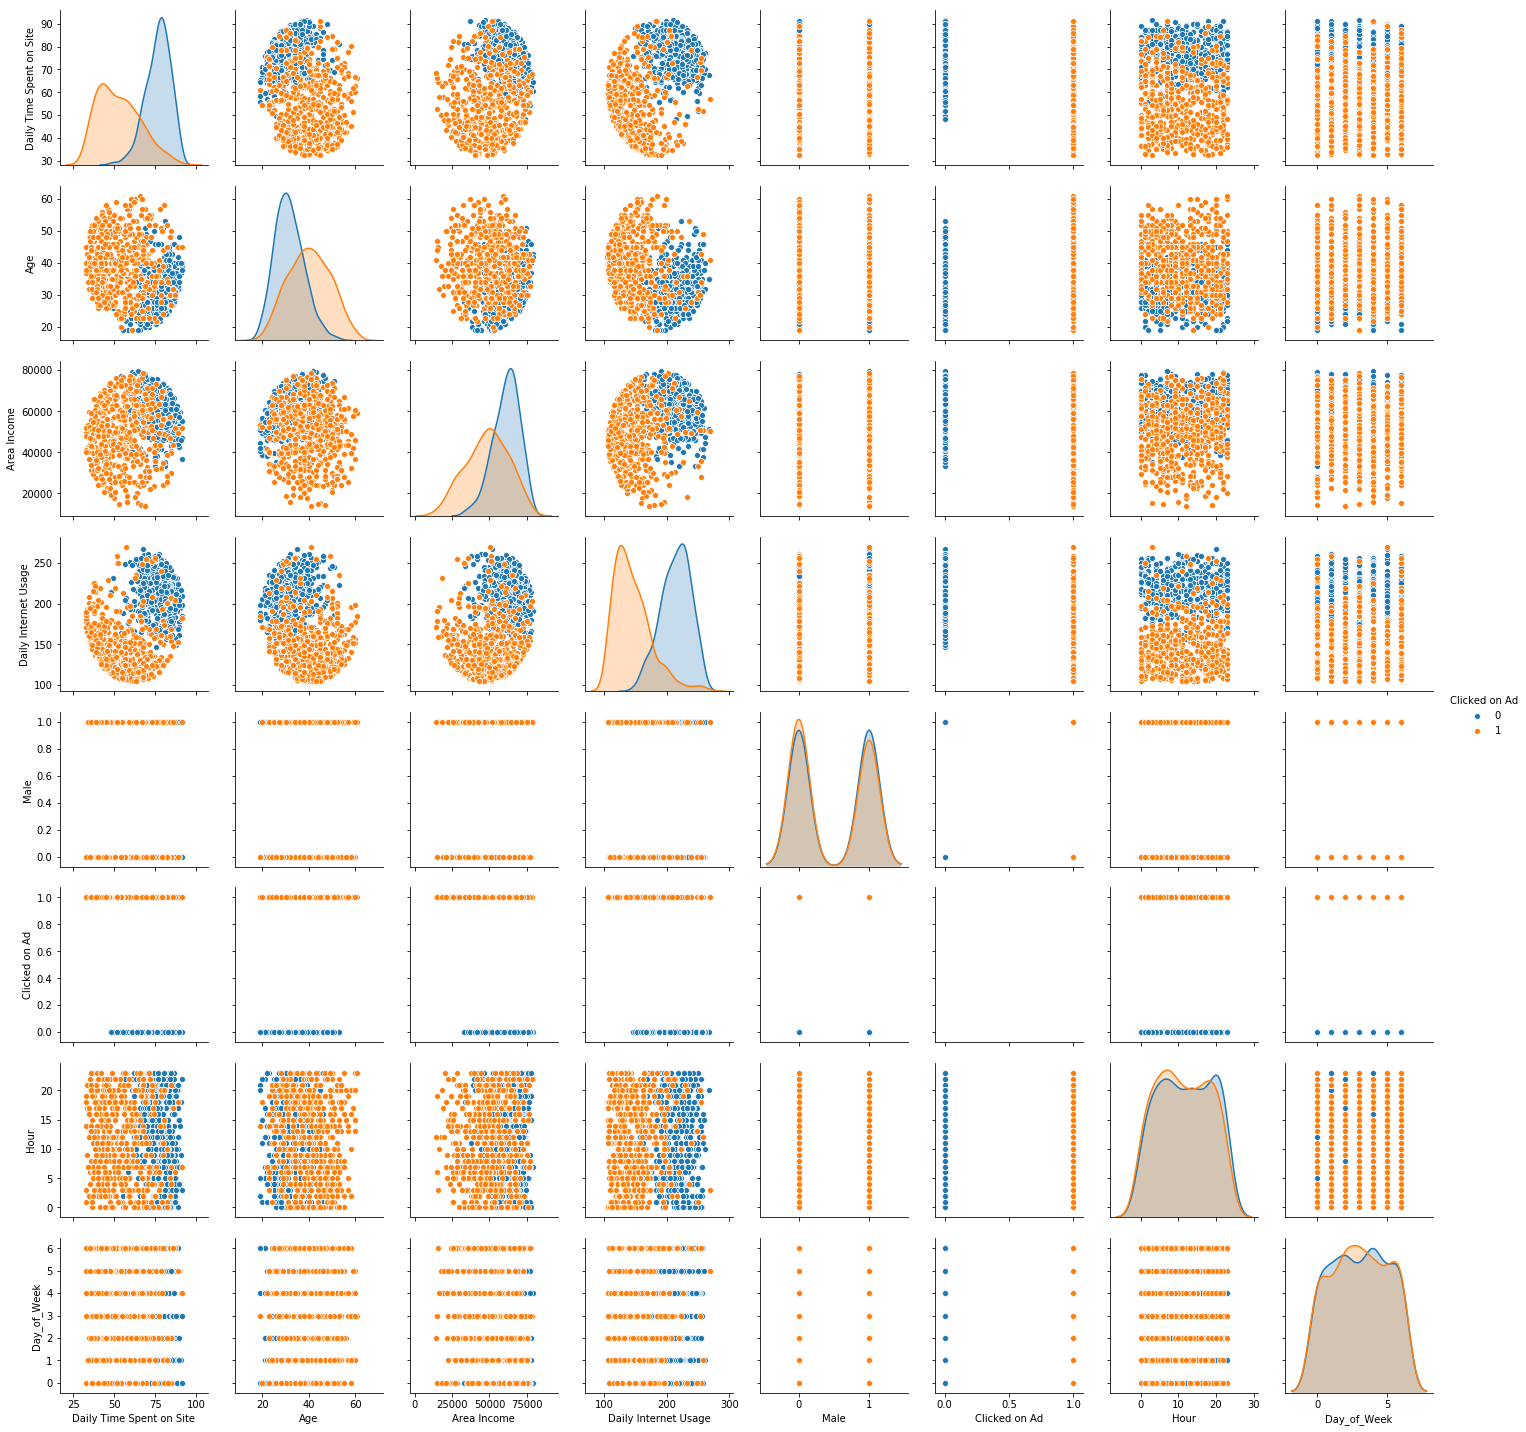

In [4]:
sns.pairplot(data=df, hue='Clicked on Ad')

** Observations** 

Note: I am interpreting 0 as clicking on the ad and 1 as not clicking on the ad (although I think this is normally reversed conventionally)

- Time spent on site seems to correlate with clicking on ad
- Younger people have more daily internet usage
- Most adds seem to have been clicked on by younger people - younger than 25 
- People with higher incomes were more likely to click on the ad 

Investigate these further. 

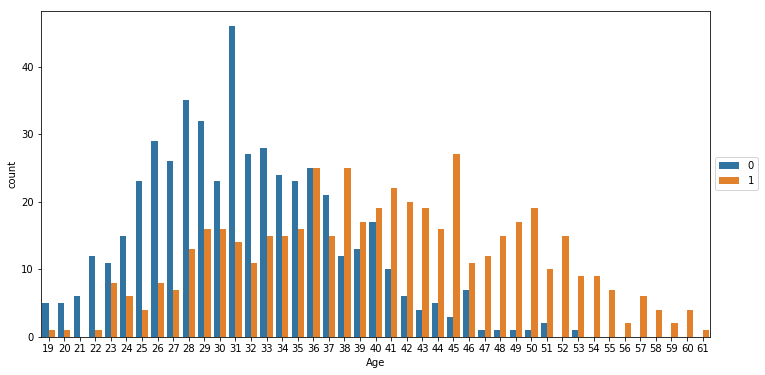

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age',data=df,hue='Clicked on Ad')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

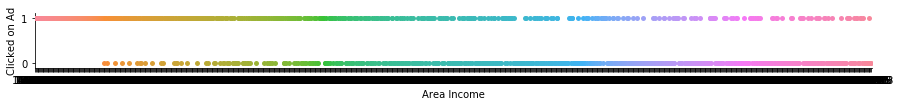

In [51]:
plt.figure(figsize=(15,1))
sns.stripplot(x='Area Income',y='Clicked on Ad', data=df, jitter=True)
sns.despine()

People who clicked on the ad (0) tended to have a higher income than those that did not. Additionally, looking at only higher income people, more of them clicked on the ad (0) than did not. -- of our sample 

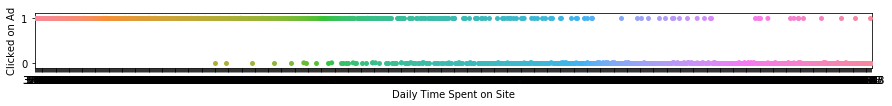

In [52]:
plt.figure(figsize=(15,1))
sns.stripplot(x='Daily Time Spent on Site',y='Clicked on Ad', data=df)


People who clicked on the ad (0) tended to spend longer on the site than those that did not. Additionally, looking at only people who spent a  long time on the site, more of them clicked on the ad (0) than did not. 

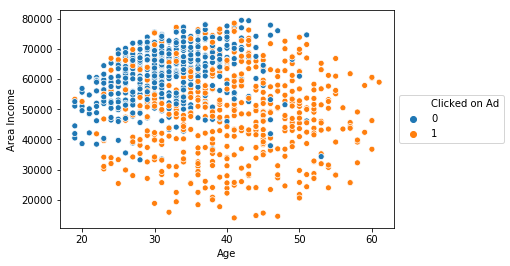

In [9]:
sns.scatterplot(x='Age',y='Area Income', data=df, hue='Clicked on Ad')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

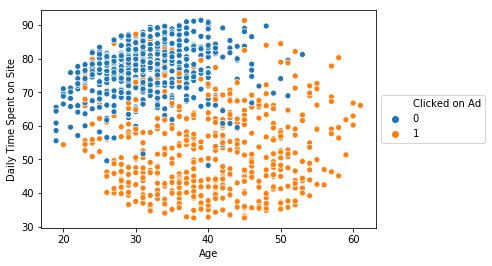

In [10]:
sns.scatterplot(x='Age',y='Daily Time Spent on Site', data=df, hue='Clicked on Ad')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

This ad is effectively targeting: 
- younger people (20-37) with larger incomes (>45,000)
- people who spend a lot of time on the site

Is this the market segment that the product is trying to target? If so, then the ads are working - if not - they should be modified. 

# Logistic Regression

Is the model better at prediction if it includes all of the features? Or just some of them? I will test 2 models to see. 


### Model 1 - Include all numeric features

In [22]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Hour', 'Day_of_Week'],
      dtype='object')

In [8]:
X1 = df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male','Hour','Day_of_Week']]
y = df['Clicked on Ad']

In [20]:
from sklearn.cross_validation import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y,test_size=0.3,random_state=101)

In [21]:
from sklearn.linear_model import LogisticRegression
logmodel1 = LogisticRegression()
logmodel1 = logmodel1.fit(X_train1,y_train1)
logmodel1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
predictions1 = logmodel1.predict(X_test1)

### Approach 2 - Only include selected columns

In [23]:
# From prev. we know that Daily time spent on site and daily internet usage were the lowest coeffs. Take them out. 
X2 = df[['Age', 'Area Income','Male','Hour','Day_of_Week']]
y = df['Clicked on Ad']

In [24]:
from sklearn.cross_validation import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y,test_size=0.3, random_state=101)

logmodel2 = LogisticRegression()
logmodel2 = logmodel2.fit(X_train2,y_train2)
logmodel2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
predictions2 = logmodel2.predict(X_test2)

## Evaluate the Models

In [26]:
# Model 1 - include everything
import statsmodels.api as sm
logit_model1=sm.Logit(y,X1)
result1=logit_model1.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.240593
         Iterations 8
                             Results: Logit
Model:                 Logit               No. Iterations:      8.0000  
Dependent Variable:    Clicked on Ad       Pseudo R-squared:    0.653   
Date:                  2018-10-08 20:58    AIC:                 495.1864
No. Observations:      1000                BIC:                 529.5407
Df Model:              6                   Log-Likelihood:      -240.59 
Df Residuals:          993                 LL-Null:             -693.15 
Converged:             1.0000              Scale:               1.0000  
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Daily Time Spent on Site -0.0656   0.0085 -7.7129 0.0000 -0.0823 -0.0489
Age                       0.2626   0.0178 14.7528 0

Age, followed by day of week, followed by maleness have the highest coefficients  and thus strongest correlation to clicking on the ad. 

In [27]:
# Model 2 - subset of features 
logit_model2=sm.Logit(y,X2)
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.439212
         Iterations 7
                        Results: Logit
Model:              Logit            No. Iterations:   7.0000  
Dependent Variable: Clicked on Ad    Pseudo R-squared: 0.366   
Date:               2018-10-08 20:58 AIC:              888.4231
No. Observations:   1000             BIC:              912.9618
Df Model:           4                Log-Likelihood:   -439.21 
Df Residuals:       995              LL-Null:          -693.15 
Converged:          1.0000           Scale:            1.0000  
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Age             0.1658   0.0110  15.0732 0.0000  0.1442  0.1873
Area Income    -0.0001   0.0000 -15.2410 0.0000 -0.0001 -0.0001
Male           -0.2025   0.1669  -1.2139 0.2248 -0.5296  0.1245
Hour           -0.0021   0.

### Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix

#Model 1
confusion_matrix1 = confusion_matrix(y_test1, predictions1)
print(confusion_matrix1)

#Model 2
confusion_matrix2 = confusion_matrix(y_test2, predictions2)
print(confusion_matrix2)

[[148   9]
 [ 16 127]]
[[132  25]
 [ 25 118]]


**Interpretation of Confusion Matrix**
        
        True Neg         False Positive
        False Neg        True Positive
        
        
Model 2 is worse 


** Create a classification report for the model.**

In [29]:
from sklearn.metrics import classification_report
print('Model 1: ' + str(classification_report(y_test1, predictions1)))
print('Model 2: ' + str(classification_report(y_test2, predictions2)))

Model 1:              precision    recall  f1-score   support

          0       0.90      0.94      0.92       157
          1       0.93      0.89      0.91       143

avg / total       0.92      0.92      0.92       300

Model 2:              precision    recall  f1-score   support

          0       0.84      0.84      0.84       157
          1       0.83      0.83      0.83       143

avg / total       0.83      0.83      0.83       300



**Model 1 (all features) has better precision, recall, and F1 scores than Model 2 (a subset of features).** 

**This is also apparent looking at the ROC curve below.** 

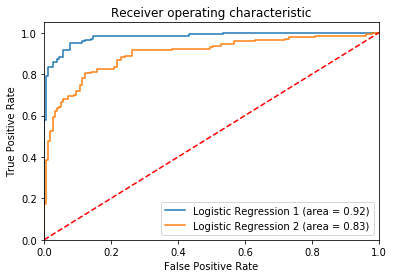

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc1 = roc_auc_score(y_test1, logmodel1.predict(X_test1))
logit_roc_auc2 = roc_auc_score(y_test2, logmodel2.predict(X_test2))
fpr1, tpr1, thresholds1 = roc_curve(y_test1, logmodel1.predict_proba(X_test1)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test2, logmodel2.predict_proba(X_test2)[:,1])

plt.figure()
plt.plot(fpr1, tpr1, label='Logistic Regression 1 (area = %0.2f)' % logit_roc_auc1)
plt.plot(fpr2, tpr2, label='Logistic Regression 2 (area = %0.2f)' % logit_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

** Interpreatation of ROC curve**

Model 1 (blue) includes all of the numeric features and is much better at predictions than model 2 which lacks some features.

## Summary: 

- I have created an accurate model to predict whethe ror not a user will click on an ad from this company based on their demographics, the time of day, and day of week. 
- This model could be used on the website to determine, in real-time, whether or not to show an ad to a new user.  
- For this situation it is best to include all of the features available to produce the best model.
